In [2]:
classes = {
    0 : "0",
    1 : "1"
}
classes

{0: '0', 1: '1'}

In [13]:
import torch

X = torch.Tensor(
    [
        [[0,0,1,0,0],
         [0,1,0,1,0],
         [0,1,0,1,0],
         [0,1,0,1,0],
         [0,0,1,0,0]],

        [[0,0,1,0,0],
         [0,1,1,0,0],
         [0,0,1,0,0],
         [0,0,1,0,0],
         [0,1,1,1,0]]


    ]
)

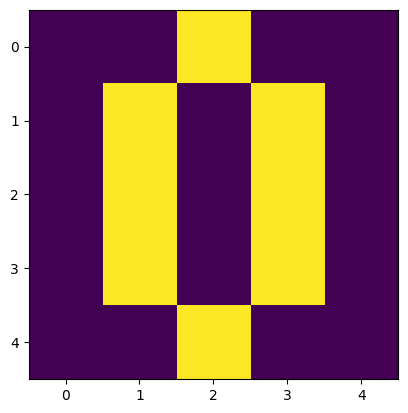

In [14]:
import matplotlib.pyplot as plt
plt.imshow(X[0])
plt.show()

In [15]:
y = torch.Tensor([0,1])
classes[y[0].item()]

'0'

In [16]:
import torch.nn as nn
import torch.nn.functional as F

class Dense(nn.Module):
  def __init__(self,x):
    super().__init__()
    self.fc1 = nn.Linear(25,32)
    self.fc2 = nn.Linear(32,32)
    self.fc3 = nn.Linear(32,2)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [18]:
net = Dense(X)

In [23]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.001)
epochs = 10000

In [24]:
losses = []
for epoch in range(epochs):
  optimizer.zero_grad()
  output = net.forward(X.view(-1,25))
  loss = loss_fn(output,y.long())
  loss.backward()
  optimizer.step()
  losses.append(loss.item())


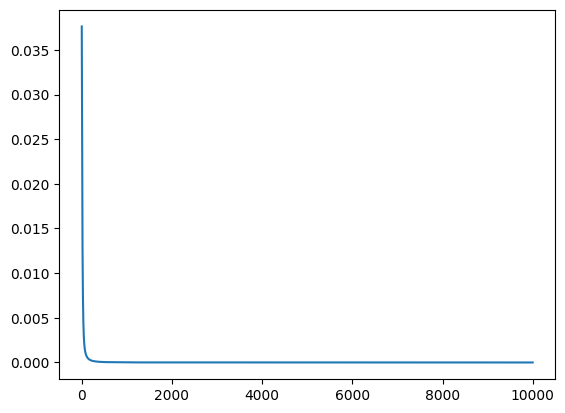

In [25]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [29]:
sample1 = torch.Tensor(
    [
        [[0,0,1,0,1],
         [0,1,0,1,1],
         [0,1,0,1,0],
         [0,1,0,1,0],
         [0,0,1,0,0]]
    ]
)

In [32]:
classes[net(sample1.view(-1,25)).max(dim=1)[1].item()]

'0'